In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import required libraries
import os
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import roc_auc_score, roc_curve, auc

In [3]:
os.chdir("/.../Chapter 7")
os.getcwd()

'/Users/Dippies/CODE PACKT - EML/Chapter 7'

In [4]:
# Read the Dataset
df_breastcancer = pd.read_csv("breastcancer.csv")

In [5]:
df_breastcancer.head(5)

,diagnosis,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
df_breastcancer.tail()

,diagnosis,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,M,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,B,92751,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [7]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df_breastcancer['diagnosis'] = lb.fit_transform(df_breastcancer['diagnosis']) #Fit label encoder and return encoded labels

df_breastcancer.head(5) #Results in appending a new column to df

,diagnosis,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
df_breastcancer.tail()

,diagnosis,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,1,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,0,92751,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [8]:
#columns_with_missing_values=df_breastcancer.columns[df_breastcancer.isnull().any()]

#df_breastcancer[columns_with_missing_values].isnull().sum()

df_breastcancer.isnull().sum() #check missing values

diagnosis                  0
id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
df_breastcancer.shape

(569, 32)

In [10]:
#create feature & response variables

# drop the response var and id column as it'll not make any sense to the analysis
X = df_breastcancer.iloc[:,2:31]  

#Target
Y = df_breastcancer.iloc[:,0] 

# Create train & test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=0, stratify= Y)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(398, 29)
(171, 29)
(398,)
(171,)


We used 'stratify' parameter so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

For example, in this case we can see that variable y is a binary categorical variable with values 0 and 1. Now suppose if there'd be 25% of zeros and 75% of ones, stratify= Y will make sure that your random split has 25% of 0's and 75% of 1's.

In [12]:
df_breastcancer.iloc[:,2:31]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,...,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,...,0.005082,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,...,0.002179,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,...,0.005412,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,...,0.003749,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,...,0.010080,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366


In [13]:
df_breastcancer.iloc[:,0]

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     0
20     0
21     0
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
539    0
540    0
541    0
542    0
543    0
544    0
545    0
546    0
547    0
548    0
549    0
550    0
551    0
552    0
553    0
554    0
555    0
556    0
557    0
558    0
559    0
560    0
561    0
562    1
563    1
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

** Using Decison Tree Classifier only **

In [16]:
dtree = DecisionTreeClassifier(max_depth=3, random_state=0)
dtree.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [17]:
# Mean accuracy
print('The mean accuracy is: ',(dtree.score(X_test,Y_test))*100,'%')

#AUC score
y_pred_dtree = dtree.predict_proba(X_test)
fpr_dtree, tpr_dtree, thresholds = roc_curve(Y_test, y_pred_dtree[:,1])
auc_dtree = auc(fpr_dtree, tpr_dtree)
print ('AUC Score: ', auc_dtree)

The mean accuracy is:  91.8128654971 %
AUC Score:  0.916179906542


**AdaBoost uses Decision Tree Classifier as default Classifier with learning_rate=0.1**

In [18]:
AdaBoost = AdaBoostClassifier(n_estimators=100, base_estimator=dtree, learning_rate=0.1, random_state=0)
AdaBoost.fit(X_train, Y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=0.1, n_estimators=100, random_state=0)

In [19]:
# Mean accuracy
print('The mean accuracy is: ',(AdaBoost.score(X_test,Y_test))*100,'%')

#AUC score
y_pred_adaboost = AdaBoost.predict_proba(X_test)
fpr_ab, tpr_ab, thresholds = roc_curve(Y_test, y_pred_adaboost[:,1])
auc_adaboost = auc(fpr_ab, tpr_ab)
print ('AUC Score: ', auc_adaboost)

The mean accuracy is:  92.9824561404 %
AUC Score:  0.975759345794


**AdaBoost uses Decision Tree Classifier as default Classifier with learning_rate=0.3**

In [20]:
# Tuning the hyperparams
AdaBoost_with_tuning = AdaBoostClassifier(n_estimators=100, base_estimator=dtree, learning_rate=0.4, random_state=0)
AdaBoost_with_tuning.fit(X_train, Y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=0.4, n_estimators=100, random_state=0)

In [21]:
# Mean accuracy
print('The mean accuracy is: ',(AdaBoost_with_tuning.score(X_test,Y_test))*100,'%')

#AUC score
y_pred_adaboost_tune = AdaBoost_with_tuning.predict_proba(X_test)
fpr_ab_tune, tpr_ab_tune, thresholds = roc_curve(Y_test, y_pred_adaboost_tune[:,1])
auc_adaboost_tune = auc(fpr_ab_tune, tpr_ab_tune)
print ('AUC Score: ', auc_adaboost_tune)

The mean accuracy is:  92.3976608187 %
AUC Score:  0.98547021028


**Using different base learner -- **
**AdaBoost uses SVC with kernel=rbf and learning_rate=1**

In [22]:
Adaboost_with_svc_rbf =AdaBoostClassifier(n_estimators=100, base_estimator=SVC(C=100, probability=True, kernel='rbf'), learning_rate=1, random_state=0)
Adaboost_with_svc_rbf.fit(X_train, Y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          learning_rate=1, n_estimators=100, random_state=0)

In [23]:
# Mean accuracy
print('The mean accuracy is: ',(Adaboost_with_svc_rbf.score(X_test,Y_test))*100,'%') 

#AUC score
y_pred_svc_rbf = Adaboost_with_svc_rbf.predict_proba(X_test)
fpr_svc_rbf, tpr_svc_rbf, thresholds = roc_curve(Y_test, y_pred_svc_rbf[:,1])
auc_svc_rbf = auc(fpr_svc_rbf, tpr_svc_rbf)
print ('AUC Score: ', auc_svc_rbf)

The mean accuracy is:  62.5730994152 %
AUC Score:  0.927351051402


In [30]:
Adaboost_with_svc_linear =AdaBoostClassifier(n_estimators=100, base_estimator=SVC(C=10, probability=True, kernel='linear'), learning_rate=0.3, random_state=0)
Adaboost_with_svc_linear.fit(X_train, Y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          learning_rate=0.3, n_estimators=100, random_state=0)

In [31]:
print('The mean accuracy is: ',(Adaboost_with_svc_linear.score(X_test,Y_test))*100,'%') 

#AUC score
y_pred = Adaboost_with_svc_linear.predict_proba(X_test)
fpr_svc_lin, tpr_svc_lin, thresholds = roc_curve(Y_test, y_pred[:,1])
auc_svc_linear = auc(fpr_svc_lin, tpr_svc_lin)
print ('AUC Score: ', auc_svc_linear)

The mean accuracy is:  82.4561403509 %
AUC Score:  0.99386682243


**Grid Search using SVC as the base learner**

In [32]:
#grid search using svm
Adaboost_with_svc = AdaBoostClassifier(base_estimator=SVC(C=100, probability=True, kernel='linear'), random_state=0)

Ada_Grid = {'n_estimators': [10, 100],
           'learning_rate': [0.3, 1]}

estimator = Adaboost_with_svc
Adaboost_with_grid_search = GridSearchCV(estimator, Ada_Grid).fit(X_train, Y_train)
print(Adaboost_with_grid_search.best_params_)
print(Adaboost_with_grid_search.best_score_)

{'learning_rate': 0.3, 'n_estimators': 10}
0.939698492462


** Comparing the performance of AdaBoost using Diffrerent models as Base estimator **


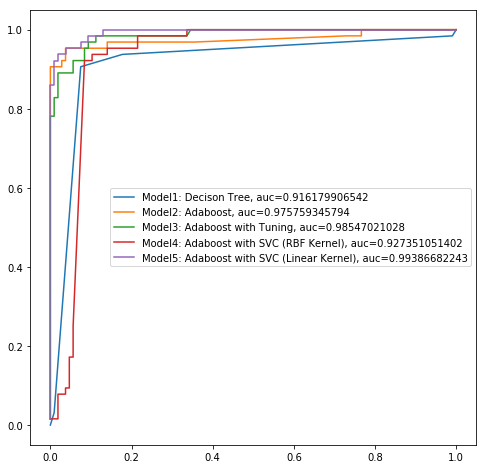

In [33]:
import matplotlib.pyplot as plt
% matplotlib inline
plt.figure(figsize=(8,8))

plt.plot(fpr_dtree, tpr_dtree,label="Model1: Decison Tree, auc="+str(auc_dtree))
plt.plot(fpr_ab, tpr_ab,label="Model2: Adaboost, auc="+str(auc_adaboost))
plt.plot(fpr_ab_tune,tpr_ab_tune,label="Model3: Adaboost with Tuning, auc="+str(auc_adaboost_tune))
plt.plot(fpr_svc_rbf, tpr_svc_rbf, label="Model4: Adaboost with SVC (RBF Kernel), auc="+str(auc_svc_rbf))
plt.plot(fpr_svc_lin, tpr_svc_lin, label="Model5: Adaboost with SVC (Linear Kernel), auc="+str(auc_svc_linear))

plt.legend(loc=5)
plt.show()

In [34]:
import matplotlib.pyplot as plt
% matplotlib inline
plt.figure(figsize=(8,8))

label = ['Decison Tree', 'Adaboost', 'Adaboost with Tuning', 'Adaboost with SVC (RBF)', 'Adaboost with SVC (Linear)']
values = [dtree.score(X_test,Y_test),
        AdaBoost.score(X_test,Y_test),
        AdaBoost_with_tuning.score(X_test,Y_test),
        Adaboost_with_svc_rbf.score(X_test,Y_test),
        Adaboost_with_svc_linear.score(X_test,Y_test)]

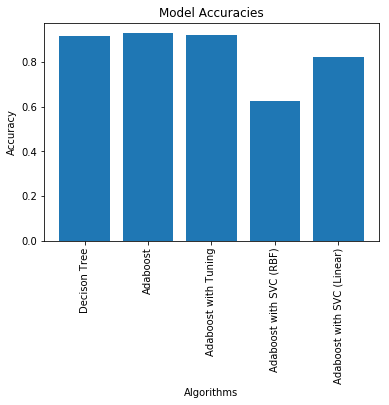

In [35]:
def plot_bar_accuracy():
    # this is for plotting purpose
    index = np.arange(len(label))
    plt.bar(index, values)
    plt.xlabel('Algorithms', fontsize=10)
    plt.ylabel('Accuracy', fontsize=10)
    plt.xticks(index, label, fontsize=10, rotation=90)
    plt.title('Model Accuracies')
    plt.show()
    
plot_bar_accuracy()